* The main motive is to test if the changes in the bottom B.C influences the simulation results. (Probably it is too deep to have an influence)! 

In [1]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import matplotlib.gridspec as gridspec
import os

In [2]:
df_obs_AWS = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv',sep='\t')
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [3]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    df_obs_AWS[f'point -{depth} temperature [K]'] = df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] + 273.15
    
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),...,Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K]
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,...,-7.814958,-4.874889,-3.447965,260.642153,261.301181,261.854514,263.325278,265.335042,268.275111,269.702035
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,...,-7.936854,-5.063889,-3.639549,261.288403,261.807431,262.202292,263.368611,265.213146,268.086111,269.510451
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,...,-7.946111,-5.228028,-3.817500,261.325486,261.949306,262.384722,263.531597,265.203889,267.921972,269.332500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,...,-7.977951,-5.358771,-3.977958,261.152153,261.784514,262.282222,263.501111,265.172049,267.791229,269.172042
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,...,-8.078194,-5.476889,-4.119438,260.778403,261.458819,261.978819,263.320347,265.071806,267.673111,269.030562


In [4]:
####  Converting Soil moisture content to saturation of liquid

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3
poro_peat = 0.501199
poro_mineral = 0.407367

for i, depth in enumerate(depths):
    if depth < depth_peat:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

### Results from BC = 268.45 K

In [27]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs_su'

In [5]:
# Reading the csv file 
df_observation = pd.read_csv('Case5_su_cv_start.demo/test_ats.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,260.326172,261.823476,262.912602,263.971727,266.011888,267.874353,269.097601,0.184240,0.187370,0.189966,0.276716,0.276729,0.276752,0.276777,0.0
1.0,86400.0,262.298353,262.453535,262.666073,263.433127,265.916261,267.806031,269.039890,0.188464,0.188834,0.189351,0.276713,0.276729,0.276750,0.276776,1.0
2.0,172800.0,261.157623,261.681489,262.067899,263.008542,265.768114,267.732465,268.981676,0.185922,0.187053,0.187926,0.276711,0.276727,0.276749,0.276774,2.0
3.0,259200.0,259.658002,260.431739,260.990704,262.253718,265.561479,267.649277,268.922016,0.182978,0.184446,0.185573,0.276708,0.276726,0.276748,0.276773,3.0
4.0,345600.0,260.317589,260.661147,260.990009,262.013200,265.342710,267.554846,268.859840,0.184223,0.184901,0.185572,0.276707,0.276724,0.276747,0.276771,4.0


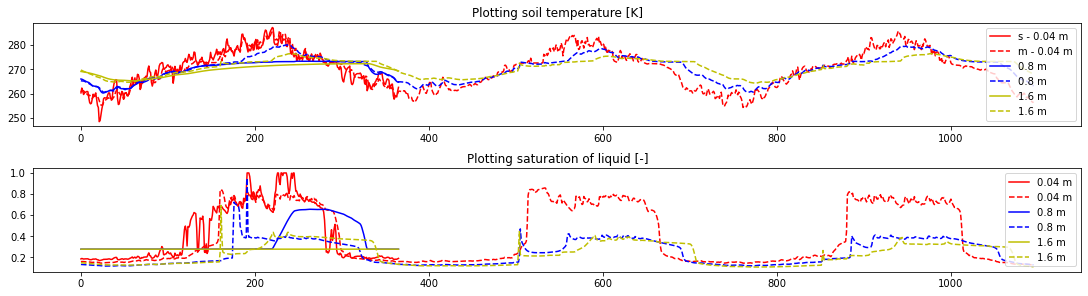

In [6]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
#f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
#f2_ax2.set_xlim(0,1500)
f2_ax2.legend()